# Data Exploration - Character Data

This module is meant to do Exploratory Data Analysis of the MNIST and NIST SD 19 character data sets before we jump into creating a MCDNN model for the dataset. 

In [3]:
##Import packages we know we will use throughout
import numpy as np
import matplotlib.pyplot as plt

### MNIST Data Exploration

We also do some research here (https://keras.io/api/datasets/mnist/) and discover that the returned data from keras for the MNIST dataset will be a tuple of two numpy arrays with the form (x_train,y_train), (x_test,y_test).

In [1]:
##First we will import and explore the MNIST dataset
from tensorflow import keras
mnist = keras.datasets.mnist.load_data()

C:\Users\btcai\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\btcai\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\btcai\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\btcai\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

For now, EDA will be performed on only the x_train and y_train data. We will resist using x_test and y_test in EDA as these discovering trends in these data might bias our model creation towards catering to the test data. The goal is to create a model that performs well on the test data that it has never seen before. 

##### What else we know about the dataset: 
We are also told that the image data here contains images with a HxW = 28x28 in grayscale. As a result of being grayscale the images only have 1 color channel, so $C=1$. 

##### Evaluate Class Representation in the Training Data

In [4]:
##First split data out by numpy arrays into train_x,train_y,test_x,test_y
train_x = mnist[0][0]
train_y = mnist[0][1]

test_x = mnist[1][0]
test_y = mnist[1][1]

##Free up local memory and toss the whole dataset now that we have np arrays w/ data
del mnist

In [8]:
##Make some analysis to evaluate the different classes in our dataset 
##Attain the unique classes in our training data
unique_classes = np.unique(train_y)

##Display statistics on how balanced the classes are
class_counts = {}
for i in unique_classes:
    class_counts[i] = (np.count_nonzero(train_y == i))

for i in class_counts.keys():
    print('Representation for Class: '+str(i))
    print('----------------------------------')
    print('Total Occurences: '+str(class_counts[i]))
    print('Percent of Training Data: '+str(class_counts[i]/len(train_y))+'\n')

Representation for Class: 0
----------------------------------
Total Occurences: 5923
Percent of Training Data: 0.09871666666666666

Representation for Class: 1
----------------------------------
Total Occurences: 6742
Percent of Training Data: 0.11236666666666667

Representation for Class: 2
----------------------------------
Total Occurences: 5958
Percent of Training Data: 0.0993

Representation for Class: 3
----------------------------------
Total Occurences: 6131
Percent of Training Data: 0.10218333333333333

Representation for Class: 4
----------------------------------
Total Occurences: 5842
Percent of Training Data: 0.09736666666666667

Representation for Class: 5
----------------------------------
Total Occurences: 5421
Percent of Training Data: 0.09035

Representation for Class: 6
----------------------------------
Total Occurences: 5918
Percent of Training Data: 0.09863333333333334

Representation for Class: 7
----------------------------------
Total Occurences: 6265
Percent 

We can see with the results above that the classes in the MNIST training dataset have about equal representation. This is a great sign because if the class were imbalanced, when we go to train a CNN, then the model may express bias towards over-represented classes when it is minimizing the loss function. This inherently would cause issues when the model tries to generalize to an environment with classes more common than what it was exposed to during training. 

Lets also quickly visualize our class balance in a bar plot to wrap this topic up. 

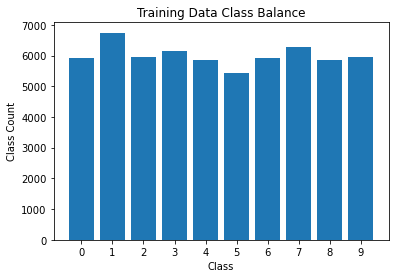

In [11]:
##For a refresher on barplots: https://www.tutorialspoint.com/plot-a-bar-using-matplotlib-using-a-dictionary
##Create bar chart to display the class balance of the dataset
plt.bar(range(len(class_counts)), list(class_counts.values()), tick_label=list(class_counts.keys()))
plt.title('Training Data Class Balance')
plt.ylabel('Class Count')
plt.xlabel('Class')
plt.show()

##### Lets View a Couple samples from Each Class
We conduct this step to have a better visual representation of what the data we would like to classify actually looks like so we can make better modeling decisions. To get a representative eye test of what the different classes look like, we will randomly select 4 observations from each class to examine. 

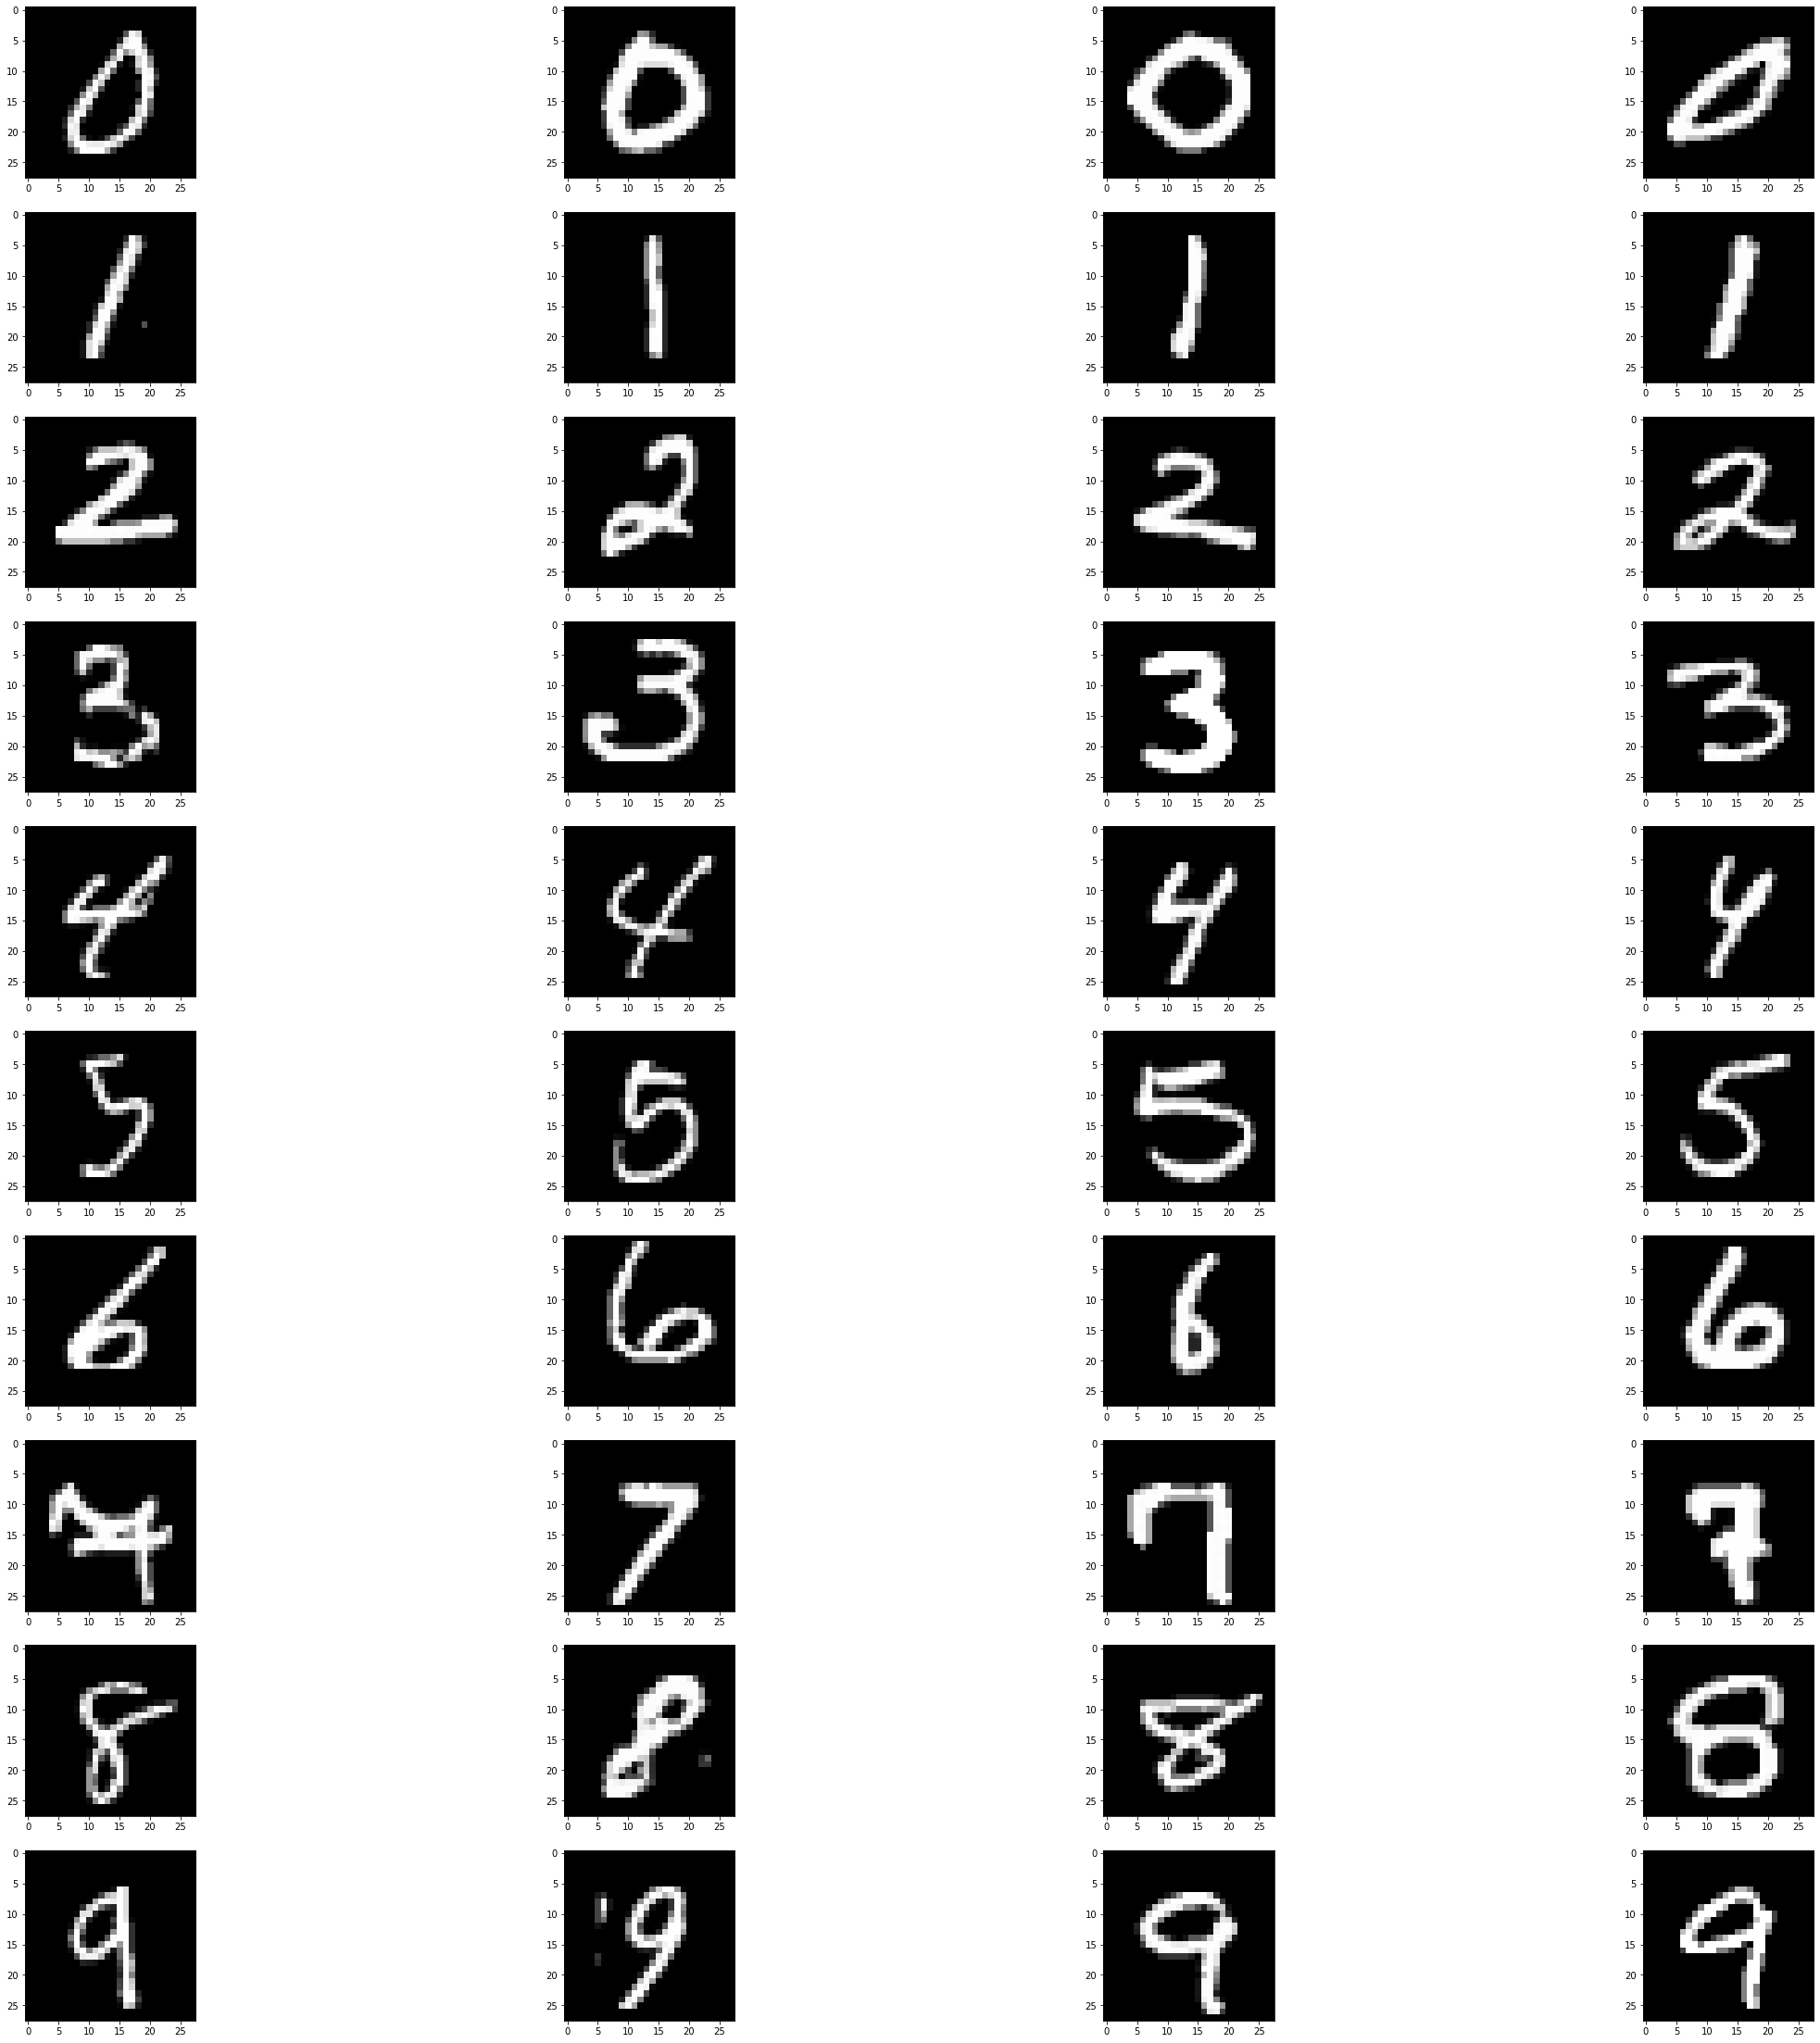

In [19]:
##Set a seed so we can reproduce random numpy results
np.random.seed(0)

##Loop through classes to get 4 random observations of each class type
random_class_observations = {}
for i in class_counts.keys():
    random_observations = train_x[np.random.choice(np.argwhere(train_y==i).flatten(),4)]
    random_class_observations[i] = random_observations

##Create a subplot with the random observations from each class
fig, ax = plt.subplots(10,4,figsize=(40,40))
count = 0
for i in random_class_observations.keys():
    if count == 10:
        break
    else: 
        ax[count,0].imshow(random_class_observations[i][0],cmap='gray')
        ax[count,1].imshow(random_class_observations[i][1],cmap='gray')
        ax[count,2].imshow(random_class_observations[i][2],cmap='gray')
        ax[count,3].imshow(random_class_observations[i][3],cmap='gray')
    count+=1

In the initial EDA above, we can see some obvious reasons why this data will at times be difficult for a network to classify, but also some trends could give us insights into how to better create a classification network. 

A few observations:
1. Some characters are written much thicker than others, while some are as well much thinner
2. Inconsistencies within classes such as 7 vs. 7 with a line through it
3. Some characters are written at a slanted angle (ex. Second observation in our 8 column) while others are written perfectly vertically oriented
4. Some individuals include an emphasized loop in the 2 numerical class, making it semi-visually similar to a 3
5. We can observe that the observation in the second column of class 9 row, there is some noise to the left hand side of the 9 character, this also might be undesirable for classification purposes. 
6. We also don't directly observe this here, but we can recall that often times individuals write the characters 4 or 9 in a fashion where the results are ambigous as to whether they are a 4 or 9. It is important that our classifier can even identify these difficult "classification" instances. 

Takeaways from Samples: <i>Viewing these random samples, we can see there are some nuances in the training data which could hinder classification accuracy. These nuances are briefly expressed in the listed observations above. One potential model of particular interest is a Multi-Column Deep Neural Network (MCDNN) for this problem. Specifically, this method splits images into multiple blocks, and view an image from different perspectives.</i>

<b>MCDNN EDA:</b> Lets split our train_x data into four different blocks and assess if we notice any trends by doing so. 

In [20]:
##We are given the images are of dimensions 28x28 so this helps create a function to split images into blocks
def create_image_blocks(imgArray):
    
    print('do something here') ##Pickup here tomorrow

### NIST SD 19 Data Exploration - (Maybe do this, or may be more fun to try on non-character data next, like CIFAR-10)